## Packages

In [50]:
'''
Import python packages
'''
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import pacmap
from hdbscan import HDBSCAN
import shap
import pandas as pd
import numpy as np
shap.initjs()
from lightgbm import LGBMClassifier
from sklearn.model_selection import GridSearchCV

## Data loading

In [51]:
'''
Load data
'''
datafile = pd.read_csv('../../data/clean_RawData.csv')
data=pd.DataFrame(datafile)
data.head()

,Unnamed: 0,XMEAS1,XMEAS2,XMEAS3,XMEAS4,XMEAS5,XMEAS6,XMEAS7,XMEAS8,XMEAS9,...,XMEAS22,XMV1,XMV2,XMV3,XMV4,XMV6,XMV7,XMV8,XMV10,XMV11
0,1,0.271033,3649.739415,4451.320791,9.223142,32.392900,47.559754,2798.975799,64.995825,122.898796,...,92.262531,62.806984,53.286709,26.662173,60.482854,24.229301,37.208198,46.430526,35.865322,12.930642
1,2,0.270826,3653.341885,4488.640140,9.211980,32.501953,47.374855,2800.296214,65.091251,122.877519,...,92.492697,62.819324,53.220324,26.689544,60.524644,24.171763,37.227431,46.427192,35.719177,11.714423
2,3,0.270474,3688.113265,4432.832766,9.235690,32.402838,47.817088,2802.647777,64.812363,122.916165,...,92.368550,62.836835,53.211797,26.705507,60.546193,25.179022,37.243766,46.442544,35.740715,10.734676
3,4,0.272127,3651.680041,4459.268940,9.192009,31.876790,47.869249,2803.693084,64.205417,122.892493,...,92.310705,62.848190,53.186885,26.768653,60.568588,26.922729,37.211698,46.407497,35.736154,10.311783
4,5,0.270939,3636.329271,4460.409756,9.277992,32.424754,47.509322,2804.787223,64.598623,122.890514,...,92.215839,62.848341,53.192271,26.396773,60.637598,29.039605,37.199517,46.424034,35.890716,11.181380


In [52]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1995 entries, 0 to 1994
Data columns (total 32 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  1995 non-null   int64  
 1   XMEAS1      1995 non-null   float64
 2   XMEAS2      1995 non-null   float64
 3   XMEAS3      1995 non-null   float64
 4   XMEAS4      1995 non-null   float64
 5   XMEAS5      1995 non-null   float64
 6   XMEAS6      1995 non-null   float64
 7   XMEAS7      1995 non-null   float64
 8   XMEAS8      1995 non-null   float64
 9   XMEAS9      1995 non-null   float64
 10  XMEAS10     1995 non-null   float64
 11  XMEAS11     1995 non-null   float64
 12  XMEAS12     1995 non-null   float64
 13  XMEAS13     1995 non-null   float64
 14  XMEAS14     1995 non-null   float64
 15  XMEAS15     1995 non-null   float64
 16  XMEAS16     1995 non-null   float64
 17  XMEAS17     1995 non-null   float64
 18  XMEAS18     1995 non-null   float64
 19  XMEAS19     1995 non-null  

In [53]:
# Drop unnecessary columns
data = data.drop(columns=['Unnamed: 0'])
data

,XMEAS1,XMEAS2,XMEAS3,XMEAS4,XMEAS5,XMEAS6,XMEAS7,XMEAS8,XMEAS9,XMEAS10,...,XMEAS22,XMV1,XMV2,XMV3,XMV4,XMV6,XMV7,XMV8,XMV10,XMV11
0,0.271033,3649.739415,4451.320791,9.223142,32.392900,47.559754,2798.975799,64.995825,122.898796,0.197826,...,92.262531,62.806984,53.286709,26.662173,60.482854,24.229301,37.208198,46.430526,35.865322,12.930642
1,0.270826,3653.341885,4488.640140,9.211980,32.501953,47.374855,2800.296214,65.091251,122.877519,0.196092,...,92.492697,62.819324,53.220324,26.689544,60.524644,24.171763,37.227431,46.427192,35.719177,11.714423
2,0.270474,3688.113265,4432.832766,9.235690,32.402838,47.817088,2802.647777,64.812363,122.916165,0.204023,...,92.368550,62.836835,53.211797,26.705507,60.546193,25.179022,37.243766,46.442544,35.740715,10.734676
3,0.272127,3651.680041,4459.268940,9.192009,31.876790,47.869249,2803.693084,64.205417,122.892493,0.220561,...,92.310705,62.848190,53.186885,26.768653,60.568588,26.922729,37.211698,46.407497,35.736154,10.311783
4,0.270939,3636.329271,4460.409756,9.277992,32.424754,47.509322,2804.787223,64.598623,122.890514,0.236146,...,92.215839,62.848341,53.192271,26.396773,60.637598,29.039605,37.199517,46.424034,35.890716,11.181380
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1990,-0.001158,3744.190299,4863.374473,8.792891,24.901362,40.390117,2903.201084,66.243082,122.882878,0.648268,...,71.171041,64.952528,58.216951,100.000000,57.399858,100.000000,41.244686,45.466296,30.171207,22.898173
1991,-0.001147,3798.451896,4864.787808,8.814539,24.783557,40.401312,2911.912112,68.055534,122.881328,0.646405,...,70.976463,65.082318,58.350766,100.000000,57.365210,100.000000,41.463254,45.413515,30.066018,26.035429
1992,-0.000370,3774.038558,4891.309364,8.659021,24.805757,40.107094,2922.391028,67.415723,122.888396,0.641291,...,70.528325,65.217638,58.502281,100.000000,57.415508,100.000000,41.700081,45.373462,30.117846,25.214501
1993,-0.000925,3812.197101,4909.631048,8.724842,24.877275,40.463346,2931.150717,67.685917,122.890874,0.645821,...,70.018196,65.376526,58.648112,100.000000,57.280676,100.000000,41.954073,45.361655,29.900523,25.175145


In [54]:
X = data
# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## Dimensionality Reduction (DR)

### PacMAP

In [55]:
# PaCMAP
embedding = pacmap.PaCMAP() 
X_pacmap = embedding.fit_transform(X)
X_pacmap

array([[ -2.7725432 ,  -9.012974  ],
       [  0.31234896,   1.7861196 ],
       [-10.665549  ,  -6.443956  ],
       ...,
       [ 13.700763  , -18.029846  ],
       [ 13.718508  , -18.027576  ],
       [ 13.725427  , -18.025984  ]], dtype=float32)

## Clustering

### Kmeans

In [56]:
num_clusters = 3
kmeans = KMeans(n_clusters=num_clusters, n_init='auto', random_state=42)
kmeans.fit(X_pacmap) 
cluster_labels= kmeans.labels_
centroids = kmeans.cluster_centers_

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.


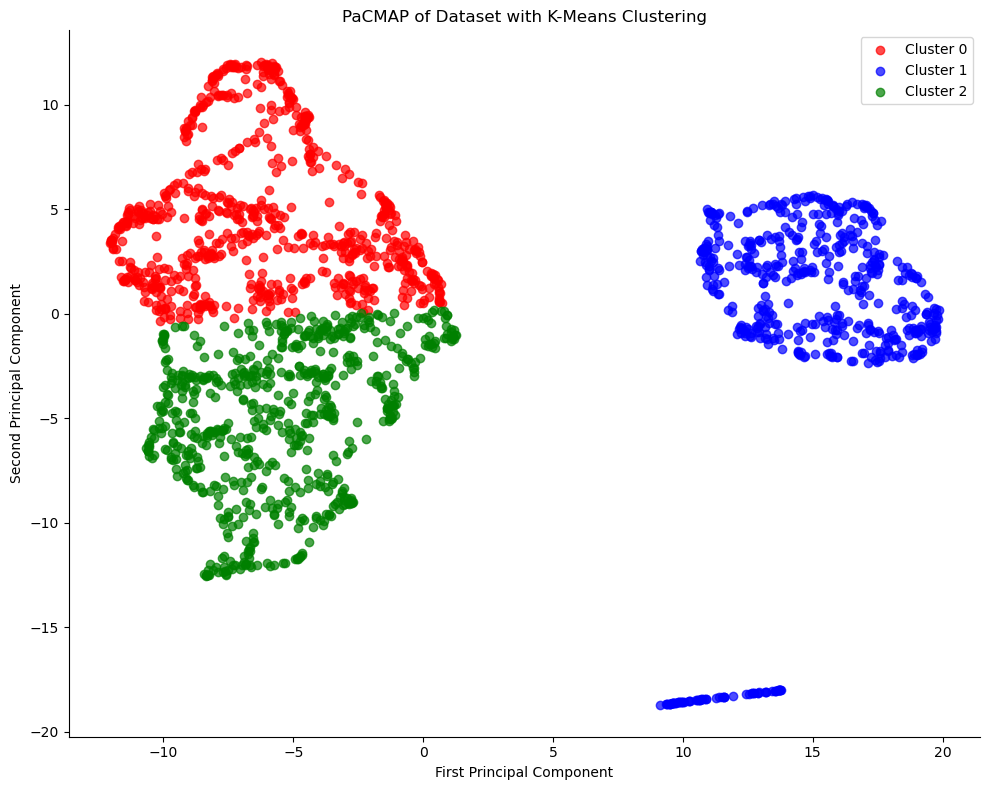

In [57]:
# PaCMAP and K-Means Plot
colors = ['red', 'blue', 'green', 'purple', 'orange']
plt.figure(figsize=(10, 8))
for i, cluster in enumerate(np.unique(cluster_labels)):
    plt.scatter(X_pacmap[cluster_labels == cluster, 0], 
                X_pacmap[cluster_labels == cluster, 1], 
                c=[colors[i % len(colors)]], 
                label=f'Cluster {cluster}',
                alpha=0.7)


plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('PaCMAP of Dataset with K-Means Clustering')
plt.legend()
sns.despine()
plt.tight_layout()
plt.show()

#### Shap (K-Means)

In [9]:
# Use SHAP to explain the K-Means model
kmeans_explainer = shap.KernelExplainer(kmeans.predict, X_pacmap)
shap_values = kmeans_explainer.shap_values(X_pacmap)

Using 1995 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


  0%|          | 0/1995 [00:00<?, ?it/s]

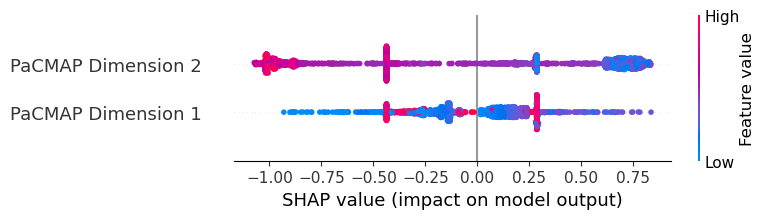

In [10]:
# Summary plot for global interpretation
shap.summary_plot(shap_values, X_pacmap, feature_names=['PaCMAP Dimension 1', 'PaCMAP Dimension 2'])

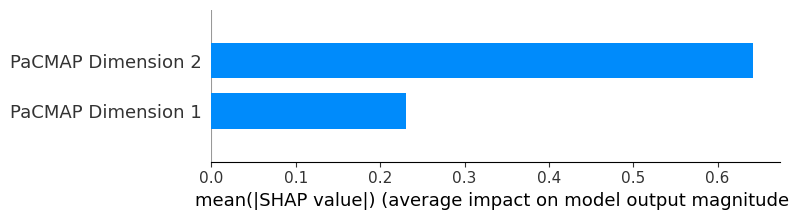

In [11]:
shap.summary_plot(shap_values, X_pacmap,feature_names=['PaCMAP Dimension 1', 'PaCMAP Dimension 2'], plot_type="bar")

In [59]:
#Reduncing the data to K=100
background_data = shap.sample(X_pacmap, 100)

# Create a SHAP explainer using the sampled background data
kmeans_explainer = shap.KernelExplainer(kmeans.predict, background_data)

# Compute SHAP values using the explainer
shap_values = kmeans_explainer.shap_values(X_pacmap)

  0%|          | 0/1995 [00:00<?, ?it/s]

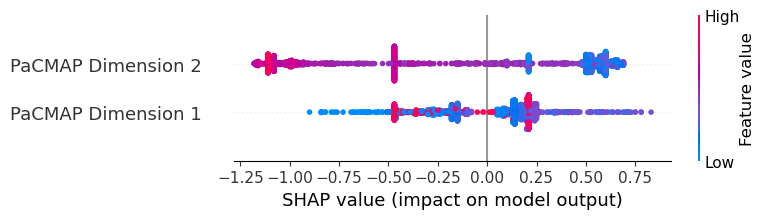

In [13]:
shap.summary_plot(shap_values, X_pacmap, feature_names=['PaCMAP Dimension 1', 'PaCMAP Dimension 2'])

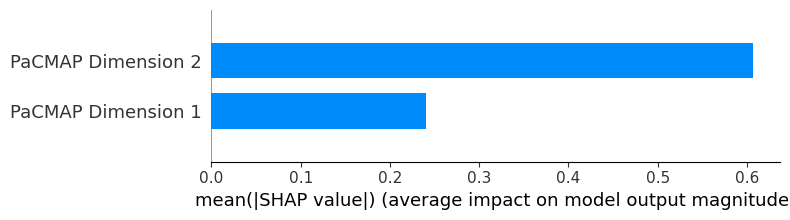

In [14]:
shap.summary_plot(shap_values, X_pacmap, feature_names=['PaCMAP Dimension 1', 'PaCMAP Dimension 2'], plot_type='bar')

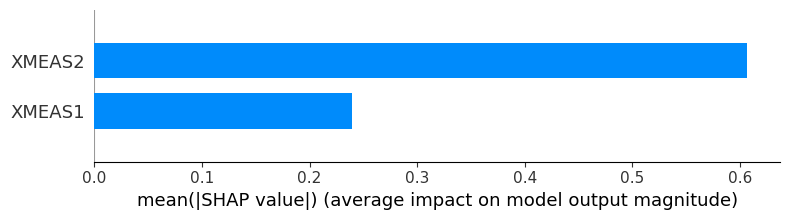

In [49]:
shap.summary_plot(shap_values, X_pacmap, feature_names=X.columns, plot_type="bar")


In [15]:
data_point_index = 0 
# Assuming shap_values[data_point_index, :] contains SHAP values for the chosen instance
shap_values_instance = shap_values[data_point_index, :]

# Get indices of features with highest positive and negative SHAP values
top_positive_features = np.argsort(shap_values_instance)[-30:][::-1]  # Adjust the number (5) based on your preference
top_negative_features = np.argsort(shap_values_instance)[:30]  # Adjust the number (5) based on your preference

# Map feature indices back to original feature names
positive_feature_names = X.columns[top_positive_features]
negative_feature_names = X.columns[top_negative_features]

# Display the relevant information
print("Top positive features:", positive_feature_names)
print("Top negative features:", negative_feature_names)

Top positive features: Index(['XMEAS2', 'XMEAS1'], dtype='object')
Top negative features: Index(['XMEAS1', 'XMEAS2'], dtype='object')


In [73]:
from sklearn.metrics import davies_bouldin_score
db_index = davies_bouldin_score(X_pacmap,cluster_labels)

rounded_value = round(db_index, 3)
text_to_print = "K-Means Clustering on PaCMAP-Reduced Data"

print(f"The Davies Bouldin score is {rounded_value} for {text_to_print}")

The Davies Bouldin score is 0.766 for K-Means Clustering on PaCMAP-Reduced Data


### Clustoring (HDBSCAN)

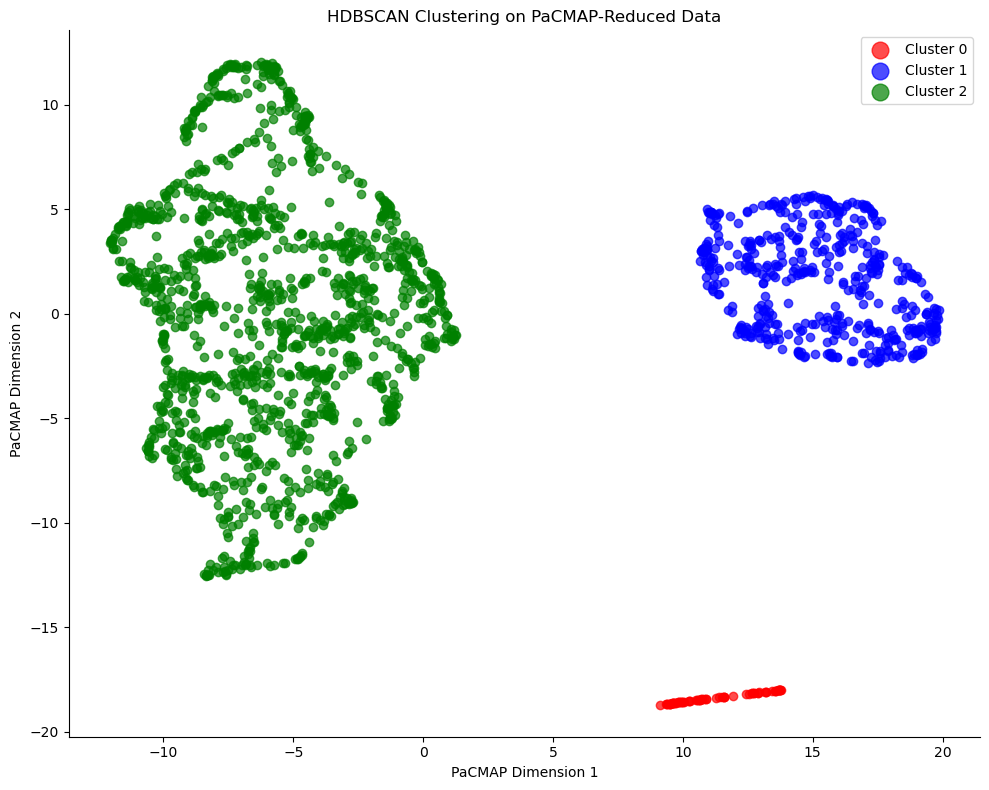

In [63]:
# HDBSCAN
clusterer = HDBSCAN(min_cluster_size=30, min_samples=20)
cluster_labels1 = clusterer.fit_predict(X_pacmap)

# PaCMAP and HDBSCAN Plot
plt.figure(figsize=(10, 8))
unique_clusters = np.unique(cluster_labels1)
for i, cluster in enumerate(unique_clusters):
    if cluster == -1: 
        color = 'grey'
        label = 'Noise'
    else:
        color = colors[i % len(colors)]
        label = f'Cluster {cluster}'
    plt.scatter(X_pacmap[cluster_labels1 == cluster, 0], 
                X_pacmap[cluster_labels1 == cluster, 1], 
                c=[color], 
                label=label,
                alpha=0.7)

plt.xlabel('PaCMAP Dimension 1')
plt.ylabel('PaCMAP Dimension 2')
plt.title('HDBSCAN Clustering on PaCMAP-Reduced Data')
plt.legend(markerscale=2)
sns.despine()
plt.tight_layout()
plt.show()

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


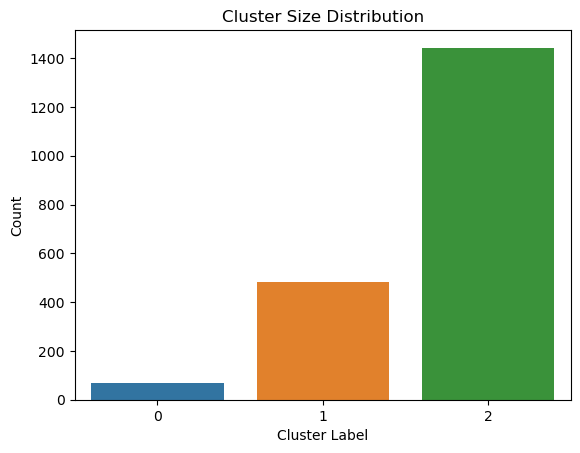

In [64]:
# Plotting cluster size distribution
sns.countplot(cluster_labels1)
plt.title('Cluster Size Distribution')
plt.xlabel('Cluster Label')
plt.ylabel('Count')
plt.show()

In [30]:
def hdbscan_predict(X):
    try:
        return clusterer.fit_predict(X)
    except ValueError as e:
        print(f"Error in hdbscan_predict: {e}")
        return np.zeros(X.shape[0])

In [31]:
background_data = shap.sample(X_pacmap, 100)

In [32]:
hdbscan_explainer = shap.KernelExplainer(hdbscan_predict, background_data)

In [33]:
shap_values1 = hdbscan_explainer.shap_values(X_pacmap)

  0%|          | 0/1995 [00:00<?, ?it/s]

Error in hdbscan_predict: k must be less than or equal to the number of training points
Error in hdbscan_predict: k must be less than or equal to the number of training points
Error in hdbscan_predict: k must be less than or equal to the number of training points
Error in hdbscan_predict: k must be less than or equal to the number of training points
Error in hdbscan_predict: k must be less than or equal to the number of training points
Error in hdbscan_predict: k must be less than or equal to the number of training points
Error in hdbscan_predict: k must be less than or equal to the number of training points
Error in hdbscan_predict: k must be less than or equal to the number of training points
Error in hdbscan_predict: k must be less than or equal to the number of training points
Error in hdbscan_predict: k must be less than or equal to the number of training points
Error in hdbscan_predict: k must be less than or equal to the number of training points
Error in hdbscan_predict: k must

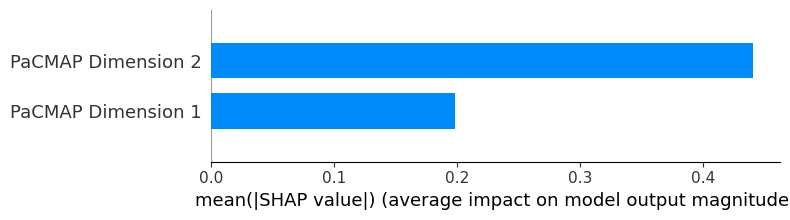

In [34]:
shap.summary_plot(shap_values1, X_pacmap, feature_names=['PaCMAP Dimension 1', 'PaCMAP Dimension 2'], plot_type="bar")

In [35]:
def hdbscan_predict(X, k=30):
    try:
        if k > X.shape[0]:
            k = X.shape[0]  # Set k to the number of training points if it's greater
        return clusterer.fit_predict(X)
    except ValueError as e:
        print(f"Error in hdbscan_predict: {e}")
        return np.zeros(X.shape[0])

In [36]:
shap_values2 = hdbscan_explainer.shap_values(X_pacmap, k=30)

  0%|          | 0/1995 [00:00<?, ?it/s]

Error in hdbscan_predict: k must be less than or equal to the number of training points
Error in hdbscan_predict: k must be less than or equal to the number of training points
Error in hdbscan_predict: k must be less than or equal to the number of training points
Error in hdbscan_predict: k must be less than or equal to the number of training points
Error in hdbscan_predict: k must be less than or equal to the number of training points
Error in hdbscan_predict: k must be less than or equal to the number of training points
Error in hdbscan_predict: k must be less than or equal to the number of training points
Error in hdbscan_predict: k must be less than or equal to the number of training points
Error in hdbscan_predict: k must be less than or equal to the number of training points
Error in hdbscan_predict: k must be less than or equal to the number of training points
Error in hdbscan_predict: k must be less than or equal to the number of training points
Error in hdbscan_predict: k must

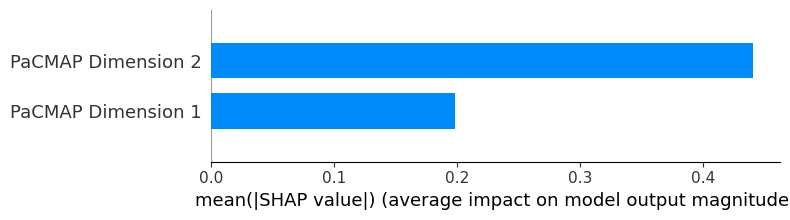

In [37]:
shap.summary_plot(shap_values2, X_pacmap, feature_names=['PaCMAP Dimension 1', 'PaCMAP Dimension 2'], plot_type="bar")

In [74]:
from sklearn.metrics import davies_bouldin_score
db_index = davies_bouldin_score(X_pacmap,cluster_labels1)

rounded_value = round(db_index, 3)
text_to_print = "HDBSCAN Clustering on PaCMAP-Reduced Data"

print(f"The Davies Bouldin score is {rounded_value} for {text_to_print}")

The Davies Bouldin score is 0.398 for HDBSCAN Clustering on PaCMAP-Reduced Data


### PCA (DR) - K-Means (Clustering)

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.


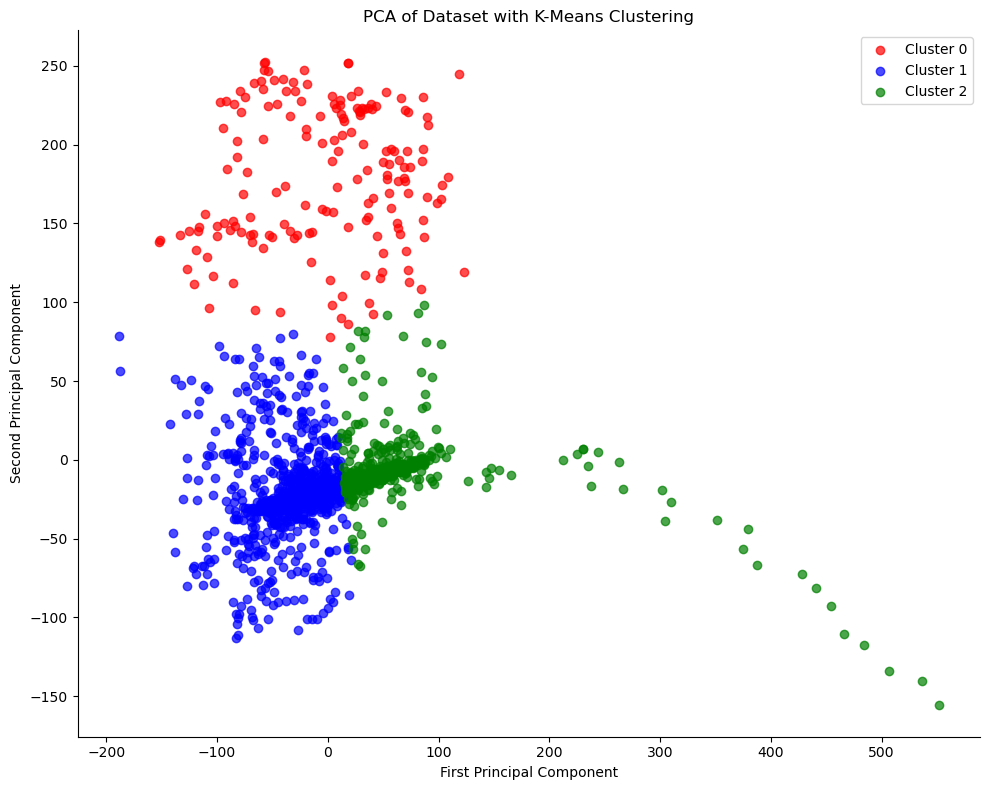

In [75]:
'''
(1) PCA and KMEANS
'''
# PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# K-Means
num_clusters = 3
kmeans = KMeans(n_clusters=num_clusters, n_init='auto', random_state=42)
kmeans.fit(X_pca) 
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

# Combined PCA and K-Means Plot
plt.figure(figsize=(10, 8))
for i, cluster in enumerate(np.unique(labels)):
    plt.scatter(X_pca[labels == cluster, 0], 
                X_pca[labels == cluster, 1], 
                c=[colors[i % len(colors)]], 
                label=f'Cluster {cluster}',
                alpha=0.7)

plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('PCA of Dataset with K-Means Clustering')
plt.legend()
sns.despine()
plt.tight_layout()
plt.show()

In [77]:
from sklearn.metrics import davies_bouldin_score
db_index = davies_bouldin_score(X_pca,labels)

rounded_value = round(db_index, 3)
text_to_print = "K-Means Clustering on PCA-Reduced Data"

print(f"The Davies Bouldin score is {rounded_value} for {text_to_print}")

The Davies Bouldin score is 0.687 for K-Means Clustering on PCA-Reduced Data


### PCA and HDBSCAN

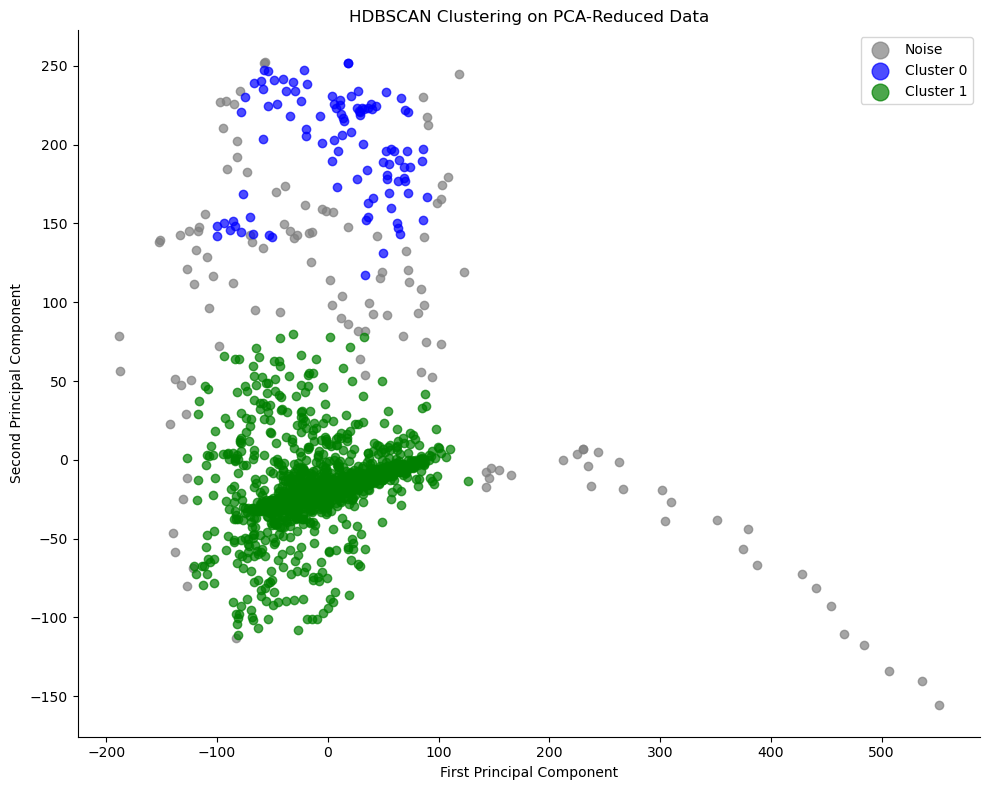

In [84]:
'''
(2) PCA and HDBSCAN
'''
# PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# HDBSCAN
clusterer = HDBSCAN(min_cluster_size=30, min_samples=20)
cluster_labels2 = clusterer.fit_predict(X_pca)

# PaCMAP and HDBSCAN Plot
plt.figure(figsize=(10, 8))
unique_clusters = np.unique(cluster_labels2)
for i, cluster in enumerate(unique_clusters):
    if cluster == -1: 
        color = 'grey'
        label = 'Noise'
    else:
        color = colors[i % len(colors)]
        label = f'Cluster {cluster}'
    plt.scatter(X_pca[cluster_labels2 == cluster, 0], 
                X_pca[cluster_labels2 == cluster, 1], 
                c=[color], 
                label=label,
                alpha=0.7)

plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('HDBSCAN Clustering on PCA-Reduced Data')
plt.legend(markerscale=2)
sns.despine()
plt.tight_layout()
plt.show()

In [81]:
from sklearn.metrics import davies_bouldin_score
db_index = davies_bouldin_score(X_pca,cluster_labels2)

rounded_value = round(db_index, 3)
text_to_print = "HDBSCAN Clustering on PCA-Reduced Data"

print(f"The Davies Bouldin score is {rounded_value} for {text_to_print}")

The Davies Bouldin score is 1.802 for HDBSCAN Clustering on PCA-Reduced Data
